In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = arff.loadarff('4year.arff')
df = pd.DataFrame(data[0])

In [3]:
df['bankruptcy'] = (df['class']==b'1')
del df['class']
df.columns = ['X{0:02d}'.format(k) for k in range(1,65)] + ['bankruptcy']

In [4]:
df.describe()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,9791.000000,9791.000000,9791.000000,9749.000000,9.771000e+03,9791.000000,9791.000000,9773.000000,9792.000000,9791.000000,...,9.792000e+03,9771.000000,9791.000000,9776.000000,9791.000000,9178.000000,9760.000000,9.771000e+03,9749.000000,9561.000000
mean,0.043019,0.596404,0.130959,8.136600,6.465164e+01,-0.059273,0.059446,19.884016,1.882296,0.389040,...,7.686330e+03,-0.992263,0.035022,1.133287,0.856053,118.156064,25.194430,2.015157e+03,8.660813,35.949619
std,0.359321,4.587122,4.559074,290.647281,1.475939e+04,6.812754,0.533344,698.697015,17.674650,4.590299,...,7.605261e+04,77.007971,8.945365,8.038201,26.393305,3230.316692,1099.260821,1.171461e+05,60.838202,483.318623
min,-12.458000,0.000000,-445.910000,-0.045319,-3.794600e+05,-486.820000,-12.458000,-1.848200,-0.032371,-445.910000,...,-7.132200e+05,-7522.100000,-597.420000,-30.892000,-284.380000,0.000000,-12.656000,-1.496500e+04,-0.024390,-0.000015
25%,0.001321,0.263145,0.020377,1.047000,-5.121700e+01,-0.000578,0.003004,0.428300,1.006675,0.294440,...,2.184000e+01,0.003121,0.008768,0.885722,0.000000,5.356325,4.267700,4.323400e+01,2.938800,2.012900
50%,0.041364,0.467740,0.199290,1.591800,-5.557600e-02,0.000000,0.048820,1.088700,1.161300,0.510450,...,9.503300e+02,0.043679,0.098026,0.958305,0.002129,9.482000,6.283550,7.472900e+01,4.848900,4.041600
75%,0.111130,0.689255,0.410670,2.880400,5.573200e+01,0.065322,0.126940,2.691000,1.970225,0.714290,...,4.694550e+03,0.117170,0.242680,0.996163,0.211790,19.506000,9.938200,1.233450e+02,8.363800,9.413500
max,20.482000,446.910000,22.769000,27146.000000,1.034100e+06,322.200000,38.618000,53209.000000,1704.800000,12.602000,...,6.123700e+06,112.020000,226.760000,668.750000,1661.000000,251570.000000,108000.000000,1.077900e+07,5662.400000,21153.000000


In [5]:
sum(df.bankruptcy == True)

515

In [6]:
sum(df.bankruptcy == False)

9277

In [7]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp_mean.fit_transform(df.values)

In [8]:
from sklearn.model_selection import train_test_split

X, y = X_imp[:, :-1], X_imp[:, -1]

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [9]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Find the 2 most important features
using Logistic Regression with L1 penalty

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# and put more...

In [11]:
lr = LogisticRegression(solver='liblinear', penalty = 'l1', C = 0.01) # complete
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
lr.coef_[lr.coef_!=0].shape # check the number of the features with non-zero weights

(2,)

In [13]:
labels = np.nonzero(lr.coef_.ravel())
print('The two features that remained are X{} and X{}'.format(labels[0][0]+1, labels[0][1]+1))

The two features that remained are X1 and X38


In [14]:
# redefine X_train_std and X_test_std
X_train_std = X_train_std[:, lr.coef_[0]!=0]
X_test_std = X_test_std[:, lr.coef_[0]!=0]

In [15]:
lr1 = LogisticRegression(solver='liblinear', penalty = 'l1', C = 0.0000001) # complete
lr1.fit(X_train, y_train)

LogisticRegression(C=1e-07, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
lr1.coef_[lr.coef_!=0].shape # check the number of the features with non-zero weights

(2,)

In [17]:
labels1 = np.nonzero(lr1.coef_.ravel())
print('The two features that remained are X{} and X{}'.format(labels1[0][0]+1, labels1[0][1]+1))

The two features that remained are X15 and X55


In [18]:
# redefine X_train and X_test for Decision Tree
X_train = X_train[:, lr1.coef_[0]!=0]
X_test = X_test[:, lr1.coef_[0]!=0]

# Overview Scatter

In [19]:
data = {'Class': np.concatenate((y_train, y_test)),
       'net profit/total assets': np.concatenate((X_train_std[:,0], X_test_std[:,0])),
       'constant capital/total assets': np.concatenate((X_train_std[:,1], X_test_std[:,1])),
       'Type': ['Train']*X_train_std.shape[0] + ['Test']*X_test_std.shape[0] }

In [20]:
df_n = pd.DataFrame(data)

In [21]:
df_n['Class'].astype('category')
df_n['Type'].astype('category')
df_n = df_n[(df_n['net profit/total assets']>-3) & (df_n['net profit/total assets']<3) & (df_n['constant capital/total assets']>-3) & (df_n['constant capital/total assets']<3)]

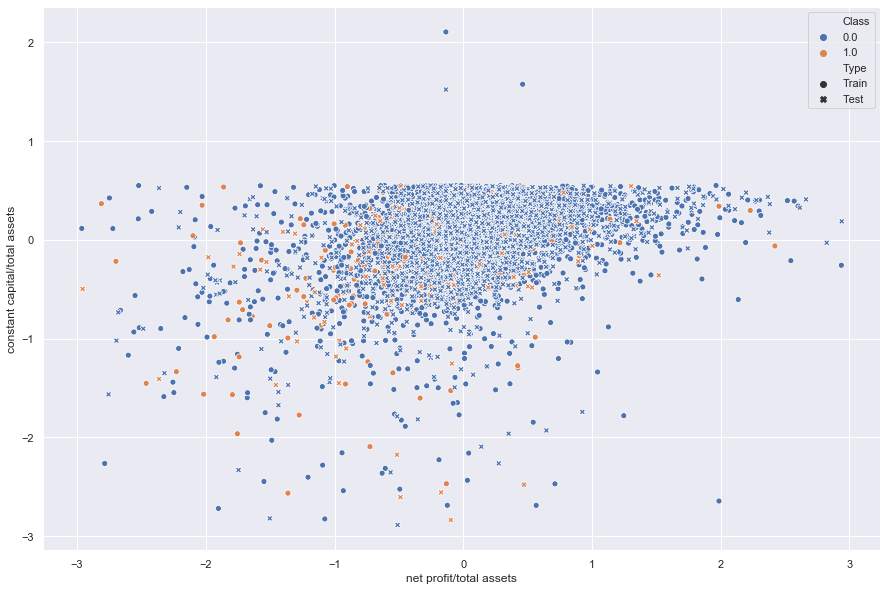

In [22]:
# X1 means net profit/total assets and X38 means constant capital/total assets
sns.set(style = 'darkgrid')
plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'net profit/total assets', y = 'constant capital/total assets', hue = 'Class', style = 'Type', data = df_n)

The number of Class 0 is much greater than Class 1, which leads to the situation where nearly all the data are regarded as Class 0.  By doing so, the number of True Positives( Class 0 classified as Class 0) is 9277, and False Positives( Class 1 classified as Class 0)  is only 515. In this situation, the Accuracy is 9277/(9277+515)=0.9474, which is quite high but cannot reflect the real results. A better metric is the Specificity = True Negatives/Negatives, which shows the classification of Negative Samples ans is 0 in our problem, because none of the Negative Samples( Class 1) are classified right.

In [23]:
data1 = {'Class': np.concatenate((y_train, y_test)),
       '(total liabilities*365)/(gross profit+dreciation)': np.concatenate((X_train[:,0], X_test[:,0])),
       'working capital': np.concatenate((X_train[:,1], X_test[:,1])),
       'Type': ['Train']*X_train.shape[0] + ['Test']*X_test.shape[0] }

In [24]:
df_n1 = pd.DataFrame(data1)

In [25]:
df_n1['Class'].astype('category')
df_n1['Type'].astype('category')
df_n1 = df_n1[(df_n1['(total liabilities*365)/(gross profit+dreciation)']>(np.mean(X_train[:,0])-3*np.std(X_train[:,0]))) &
              (df_n1['(total liabilities*365)/(gross profit+dreciation)']<(np.mean(X_train[:,0])+3*np.std(X_train[:,0]))) & 
              (df_n1['working capital']>(np.mean(X_train[:,1])-3*np.std(X_train[:,1]))) & 
              (df_n1['working capital']<(np.mean(X_train[:,1])+3*np.std(X_train[:,1])))]

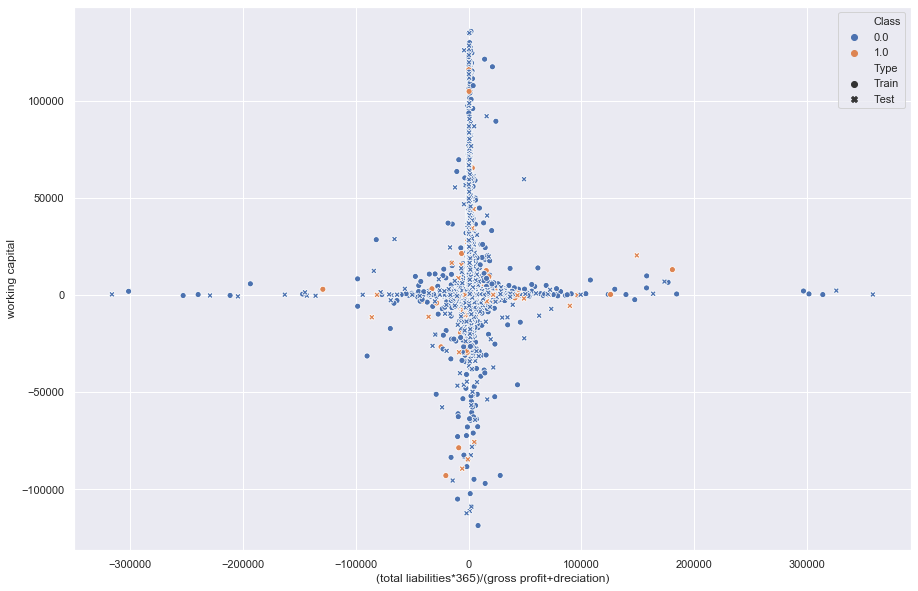

In [26]:
# X15 means （total liabilities*365）/(gross profit+dreciation) and X55 means working capital
plt.figure(figsize=(15, 10))
sns.scatterplot(x = '(total liabilities*365)/(gross profit+dreciation)', y = 'working capital', hue = 'Class', style = 'Type', data = df_n1)

# Apply LR / SVM / Decision Tree below

## Logistic Regression

In [27]:
lr_test_score, lr_train_score = {'l1': [], 'l2': []}, {'l1': [], 'l2': []}
C = [10**i for i in range(-5, 6)]
P = ['l1', 'l2']
for penal in P:
    for item in C:
        lr = LogisticRegression(solver='liblinear', penalty=penal, C = item)
        lr.fit(X_train_std, y_train)
        lr_train_score[penal].append(lr.score(X_train_std, y_train))
        lr_test_score[penal].append(lr.score(X_test_std, y_test))

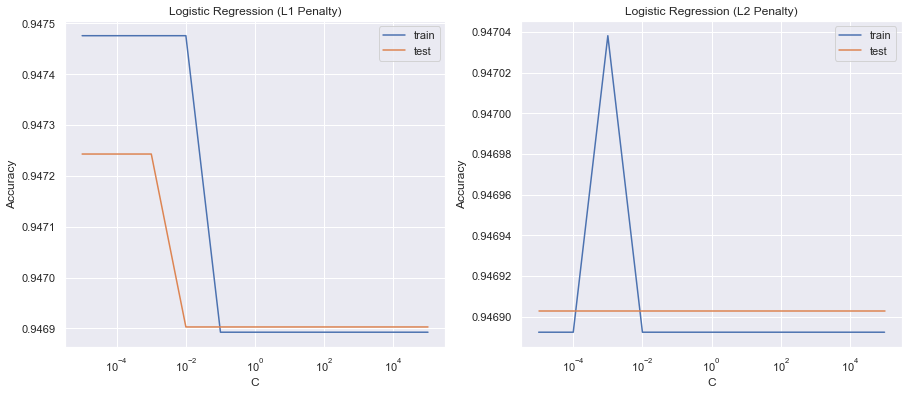

In [28]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(C, lr_train_score['l1'], label = 'train')
plt.plot(C, lr_test_score['l1'], label = 'test')
plt.xscale('log')
plt.grid(True)

plt.xlabel('C')
plt.ylabel('Accuracy')

plt.title('Logistic Regression (L1 Penalty)')

plt.legend()

plt.subplot(122)
plt.plot(C, lr_train_score['l2'], label = 'train')
plt.plot(C, lr_test_score['l2'], label = 'test')
plt.xscale('log')
plt.grid(True)

plt.xlabel('C')
plt.ylabel('Accuracy')

plt.title('Logistic Regression (L2 Penalty)')

plt.legend()

In [29]:
print('Training accuracy:', max(lr_train_score['l1']))
print('Test accuracy:', max(lr_test_score['l1']))
print('Parameters: C = {}, Penalty = {}'.format(0.01, 'L1'))

Training accuracy: 0.9474759264662971
Test accuracy: 0.9472430224642614
Parameters: C = 0.01, Penalty = L1


## Support Vector Mechine

In [30]:
from sklearn.svm import SVC

Cp = [10**i for i in range(-5, 0)]
G = [10**i for i in range(-5, 0)]
L = len(Cp)
K = ['linear', 'poly', 'rbf', 'sigmoid']

data = {
    'linear':{
        'train':np.zeros((L,L)),
        'test':np.zeros((L,L))
    },
    'poly':{
        'train':np.zeros((L,L)),
        'test':np.zeros((L,L))
    },
    'rbf':{
        'train':np.zeros((L,L)),
        'test':np.zeros((L,L))
    },
    'sigmoid':{
        'train':np.zeros((L,L)),
        'test':np.zeros((L,L))
    }
}

for k in K:
    for i in range(L):
        for j in range(L):
            svm = SVC(kernel=k, random_state=1, gamma=G[j], C=Cp[i])
            svm.fit(X_train_std, y_train)
            data[k]['train'][j,i]=svm.score(X_train_std, y_train)
            data[k]['test'][j,i]=svm.score(X_test_std, y_test)

In [31]:
for k in K:
    index = int(data[k]['train'].argmax())
    x = int(index / L)
    y = index % L
    print('Train accuracy with {} kernel:{},corresponding parameters: gamma={}, C={}'.format(k,data['linear']['train'][x, y],G[x],Cp[y]))
    index = int(data[k]['test'].argmax())
    x = int(index / L)
    y = index % L
    print('Test accuracy with {} kernel:{},corresponding parameters: gamma={}, C={}'.format(k,data['linear']['test'][x, y],G[x],Cp[y]))
    print('\n')

Train accuracy with linear kernel:0.9474759264662971,corresponding parameters: gamma=1e-05, C=1e-05
Test accuracy with linear kernel:0.9472430224642614,corresponding parameters: gamma=1e-05, C=1e-05


Train accuracy with poly kernel:0.9474759264662971,corresponding parameters: gamma=0.01, C=0.001
Test accuracy with poly kernel:0.9472430224642614,corresponding parameters: gamma=1e-05, C=1e-05


Train accuracy with rbf kernel:0.9474759264662971,corresponding parameters: gamma=1e-05, C=1e-05
Test accuracy with rbf kernel:0.9472430224642614,corresponding parameters: gamma=1e-05, C=1e-05


Train accuracy with sigmoid kernel:0.9474759264662971,corresponding parameters: gamma=1e-05, C=1e-05
Test accuracy with sigmoid kernel:0.9472430224642614,corresponding parameters: gamma=1e-05, C=1e-05




## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree_test_score, tree_train_score = {'gini': [], 'entropy': []}, {'gini': [], 'entropy': []}
D = [i for i in range(1, 6)]
Criterion = ['gini', 'entropy']
for cr in Criterion:
    for item in D:
        tree = DecisionTreeClassifier(criterion=cr, max_depth=item, random_state=1)
        tree.fit(X_train, y_train)
        tree_train_score[cr].append(tree.score(X_train, y_train))
        tree_test_score[cr].append(tree.score(X_test, y_test))

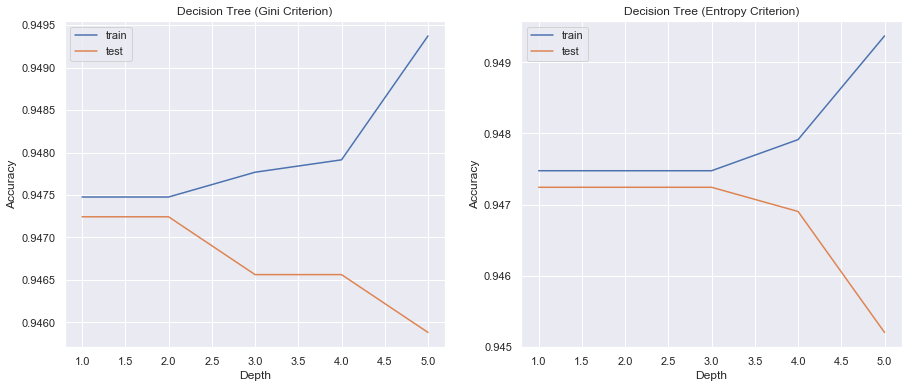

In [33]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(D, tree_train_score['gini'], label = 'train')
plt.plot(D, tree_test_score['gini'], label = 'test')
plt.grid(True)

plt.xlabel('Depth')
plt.ylabel('Accuracy')

plt.title('Decision Tree (Gini Criterion)')

plt.legend()

plt.subplot(122)
plt.plot(D, tree_train_score['entropy'], label = 'train')
plt.plot(D, tree_test_score['entropy'], label = 'test')
plt.grid(True)

plt.xlabel('Depth')
plt.ylabel('Accuracy')

plt.title('Decision Tree (Entropy Criterion)')

plt.legend()

In [34]:
print('Training accuracy:', min(tree_train_score['gini']))
print('Test accuracy:', min(tree_test_score['gini']))
print('Parameters: Depth = {}, Criterion = {}'.format(2, 'gini'))

Training accuracy: 0.9474759264662971
Test accuracy: 0.9458815520762424
Parameters: Depth = 2, Criterion = gini


# Visualize the classification

In [35]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
#                            np.arange(x2_min, x2_max, resolution))

    '''
     According to 3-sigma, 99% data will be included 
     in the interval [-3\sigma, 3\sigma]
     So using this interval instead of the max and the min
     to get rid of the extreme data.
     For LR and SVM, data have been standardized,so using [-3, 3]
     For Tree, data have not been standardized, so using  [\mu-3\sigma, \mu+3\sigma]
    '''
    if classifier == tree:
        mean_1 = np.mean(X_train[:,0])
        sigma_1 = np.std(X_train[:,0])
        mean_2 = np.mean(X_train[:,1])
        sigma_2 = np.std(X_train[:,1])
        xx1, xx2 = np.meshgrid(np.arange((mean_1-3*sigma_1)/sigma_1, (mean_1+3*sigma_1)/sigma_1, resolution),
                               np.arange((mean_2-3*sigma_2)/sigma_2, (mean_2+3*sigma_2)/sigma_2, resolution))
    else:
        xx1, xx2 = np.meshgrid(np.arange(-3, 3, resolution),
                               np.arange(-3, 3, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [36]:
X_combined_std = np.vstack((X_train_std, X_test_std))
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

Text(0.5, 1.0, 'Logistic Regression(l1 penalty, C=0.01)')

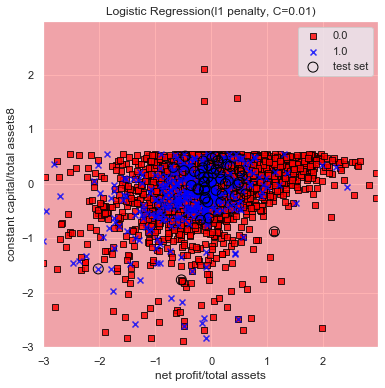

In [39]:
lr = LogisticRegression(solver='liblinear', penalty='l1', C = 0.01)
lr.fit(X_train_std, y_train)
plt.figure(figsize=(6, 6))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(0, 50))
plt.xlabel('net profit/total assets')
plt.ylabel('constant capital/total assets8')
plt.legend(loc='upper right')
plt.title('Logistic Regression(l1 penalty, C=0.01)')

Text(0.5, 1.0, 'Support Vector Mechine(sigmoid kernel, gamma=10e-5, C=10e-5)')

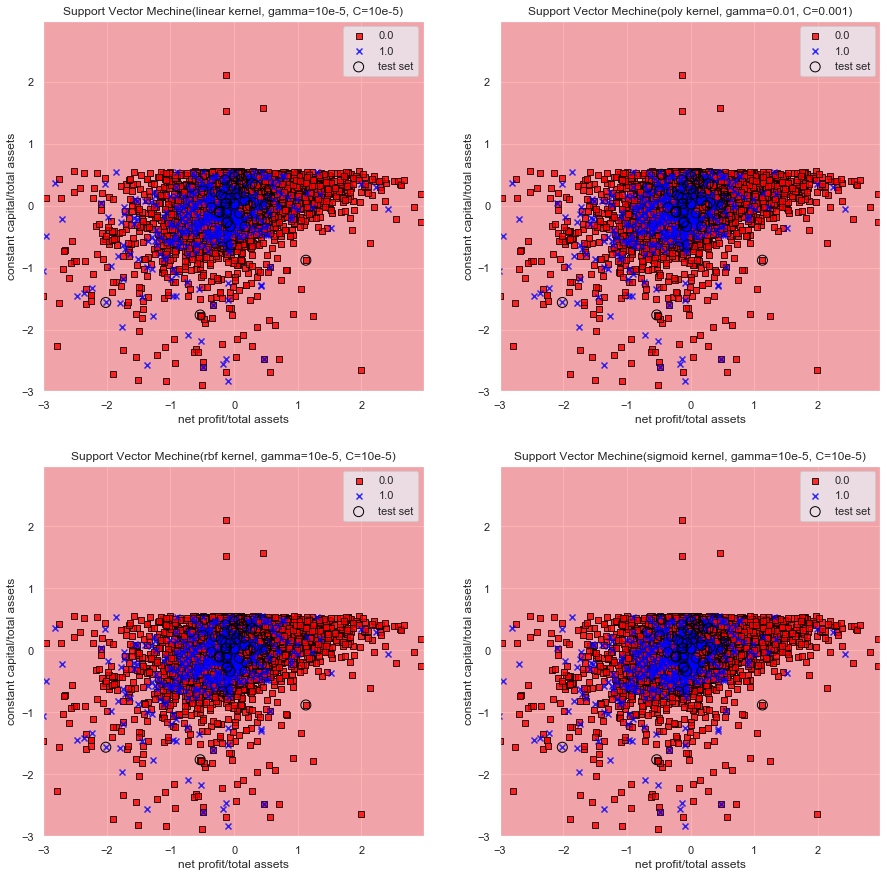

In [40]:
plt.figure(figsize=(15, 15))

plt.subplot(221)
svm = SVC(kernel='linear', random_state=1, gamma=10**-5, C=10**-5)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(0, 50))
plt.xlabel('net profit/total assets')
plt.ylabel('constant capital/total assets')
plt.legend(loc='upper right')
plt.title('Support Vector Mechine(linear kernel, gamma=10e-5, C=10e-5)')

plt.subplot(222)
svm = SVC(kernel='poly', random_state=1, gamma=0.01, C=0.001)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(0, 50))
plt.xlabel('net profit/total assets')
plt.ylabel('constant capital/total assets')
plt.legend(loc='upper right')
plt.title('Support Vector Mechine(poly kernel, gamma=0.01, C=0.001)')

plt.subplot(223)
svm = SVC(kernel='rbf', random_state=1, gamma=10**-5, C=10**-5)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(0, 50))
plt.xlabel('net profit/total assets')
plt.ylabel('constant capital/total assets')
plt.legend(loc='upper right')
plt.title('Support Vector Mechine(rbf kernel, gamma=10e-5, C=10e-5)')

plt.subplot(224)
svm = SVC(kernel='sigmoid', random_state=1, gamma=10**-5, C=10**-5)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(0, 50))
plt.xlabel('net profit/total assets')
plt.ylabel('constant capital/total assets')
plt.legend(loc='upper right')
plt.title('Support Vector Mechine(sigmoid kernel, gamma=10e-5, C=10e-5)')

Text(0.5, 1.0, 'Decision Tree(No standardization, gini criterion, depth=2)')

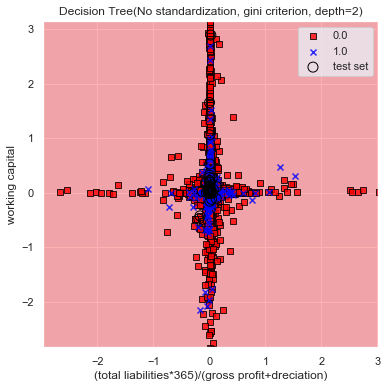

In [41]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
tree.fit(X_train, y_train)
plt.figure(figsize=(6, 6))
'''
The data have been scaled, because it will creat a huge sparse matrix without scaling, which will lead to a error.
'''
X_combined = X_combined/np.array([np.std(X_train[:,0]), np.std(X_train[:,1])])
plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=tree, test_idx=range(0, 50))
plt.xlabel('(total liabilities*365)/(gross profit+dreciation)')
plt.ylabel('working capital')
plt.legend(loc='upper right')
plt.title('Decision Tree(No standardization, gini criterion, depth=2)')

# plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
# plt.show()